In [98]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import fpdf

In [93]:
df = pd.read_csv('../output/predicted.csv')
df.head()

,Unnamed: 0,id,text,category
0,0,1180633752885743616,People at the cinema thinking they got the #Jo...,PLOT
1,1,1180633751744913408,I have a new favorite joker @jokermovie #Joker...,NaN
2,2,1180633723932483584,"⭐⭐⭐⭐⭐ Performance, what a movie #JokerMovie pi...",NaN
3,3,1180633642198077441,#JokerMovie was absolutely amazing and ended w...,HYPE
4,4,1180633577693880321,I just want to give both Arthur Fleck and Gary...,CHARACTERS


In [4]:
sia = SentimentIntensityAnalyzer()

sentence = df['text'][0]
sia.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612}

In [5]:
for index, row in df.iterrows():
    sentence = row['text']
    df.loc[index, 'sentiment'] = sia.polarity_scores(sentence)
    
    
    
    
    
for index, row in df.iterrows():
        doc = nlp(row['text'])
        for ent in doc.ents:
            df.loc[index, 'category'] = [(ent.label_)]

ValueError: Must have equal len keys and value when setting with an iterable

In [9]:
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x))

In [10]:
df.head()

,Unnamed: 0,id,text,category,sentiment
0,0,1180633752885743616,People at the cinema thinking they got the #Jo...,PLOT,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
1,1,1180633751744913408,I have a new favorite joker @jokermovie #Joker...,NaN,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp..."
2,2,1180633723932483584,"⭐⭐⭐⭐⭐ Performance, what a movie #JokerMovie pi...",NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,1180633642198077441,#JokerMovie was absolutely amazing and ended w...,HYPE,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp..."
4,4,1180633577693880321,I just want to give both Arthur Fleck and Gary...,CHARACTERS,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp..."


In [38]:
df['negative'] = df['sentiment'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment'].apply(lambda x: x['neu'])
df['positive'] = df['sentiment'].apply(lambda x: x['pos'])

In [39]:
df.head()

,Unnamed: 0,id,text,category,sentiment,negative,neutral,positive
0,0,1180633752885743616,People at the cinema thinking they got the #Jo...,PLOT,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...",0.0,0.815,0.185
1,1,1180633751744913408,I have a new favorite joker @jokermovie #Joker...,NaN,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.0,0.526,0.474
2,2,1180633723932483584,"⭐⭐⭐⭐⭐ Performance, what a movie #JokerMovie pi...",NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000
3,3,1180633642198077441,#JokerMovie was absolutely amazing and ended w...,HYPE,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.0,0.674,0.326
4,4,1180633577693880321,I just want to give both Arthur Fleck and Gary...,CHARACTERS,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.0,0.714,0.286


In [40]:
df['negative'].mean()

0.0592680601040262

In [41]:
df['neutral'].mean()

0.7931659121556539

In [42]:
df['positive'].mean()

0.14756814679252553

In [44]:
sentiment = pd.DataFrame([df['negative'].mean(), df['neutral'].mean(), df['positive'].mean()])

<ipython-input-86-c210bba7358b>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sentiment, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)


([<matplotlib.patches.Wedge at 0x129f70250>,
 [Text(-0.21288996171989744, 1.1301229420726318, 'Negative'),
  Text(-0.3149370624485987, -1.1060355539928397, 'Neutral'),
  Text(0.5142448616769113, 1.0286166546575524, 'Positive')],
 [Text(-0.16660953525905015, 0.8844440416220595, '5.9%'),
  Text(-0.246472483655425, -0.8655930422552657, '79.3%'),
  Text(0.4024525004428002, 0.8050043384276496, '14.8%')])

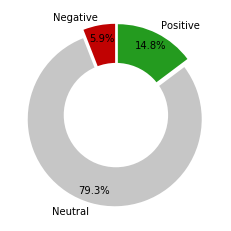

In [86]:
colors = ['#C00202','#C6C6C6','#249B1F']
labels = ['Negative', 'Neutral', 'Positive']
explode = (0.05,0.05,0.05)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.pie(sentiment, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

The graph is done


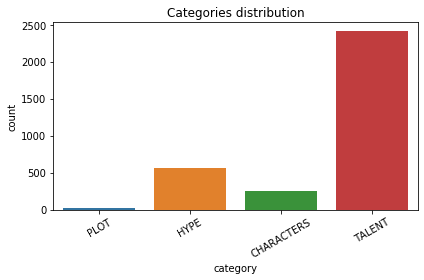

In [60]:
graph = sns.countplot(data=df, x = 'category')
plt.title('Categories distribution')
plt.xticks(rotation=30)
plt.tight_layout()
#plt.savefig('../output/barcategories') 
print('The graph is done')

In [61]:
def graphCategory(df):
    graph = sns.countplot(data=df, x = 'category')
    plt.title('Categories distribution')
    plt.xticks(rotation=30)
    plt.tight_layout()
    #plt.savefig('../output/barcategories') 
    print('Your category graph is ready in the output folder')

Your category graph is ready in the output folder


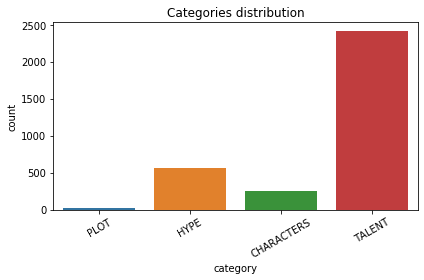

In [62]:
graphCategory(df)

In [64]:
df_group = df.groupby('category').agg({'negative':'mean', 'neutral':'mean', 'positive':'mean'})

In [77]:
df_group.head()

,negative,neutral,positive
category,,,
CHARACTERS,0.057925,0.762071,0.179976
HYPE,0.069270,0.753009,0.177737
PLOT,0.047000,0.822857,0.130238
TALENT,0.058945,0.759957,0.181102


Your sentiment by category graph is ready in the output folder


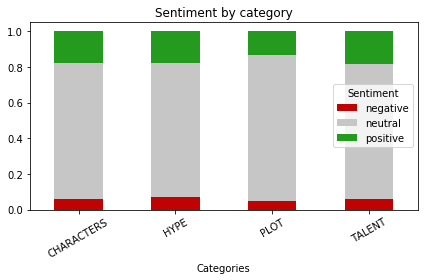

In [87]:
colors = ['#C00202','#C6C6C6','#249B1F']

df_group.plot(colors = colors, kind='bar', stacked=True)
plt.title('Sentiment by category')
plt.xticks(rotation=30)
plt.tight_layout()
plt.gca()
plt.xlabel('Categories')
plt.legend(title='Sentiment', loc='best')
plt.savefig('../output/sentimentcat') 
print('Your sentiment by category graph is ready in the output folder')

In [88]:
def graphSentCat(df):
    df_group = df.groupby('category').agg({'negative':'mean', 'neutral':'mean', 'positive':'mean'})
    colors = ['#C00202','#C6C6C6','#249B1F']
    df_group.plot(colors = colors, kind='bar', stacked=True)
    plt.title('Sentiment by category')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.gca()
    plt.xlabel('Categories')
    plt.legend(title='Sentiment', loc='best')
    plt.savefig('../output/sentimentcat') 
    print('Your sentiment by category graph is ready in the output folder')

Your sentiment by category graph is ready in the output folder


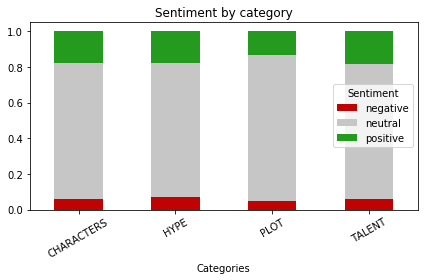

In [89]:
graphSentCat(df)

In [99]:
def graphSentiment(df):
    #Sentiment analysis
    df = sentimentAnalysis(df)

    #Get a sentiment graph 
    sentiment = pd.DataFrame([df['negative'].mean(), df['neutral'].mean(), df['positive'].mean()])
    colors = ['#C00202','#C6C6C6','#249B1F']
    labels = ['Negative', 'Neutral', 'Positive']
    explode = (0.05,0.05,0.05)
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    plt.figure()
    plt.subplot()
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.pie(sentiment, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
    
    plt.title('Sentiment Analysis')
    plt.tight_layout()
    plt.savefig('../output/sentiment') 
    
    print('Your sentiment graph is ready in the output folder')

In [94]:
def sentimentAnalysis(df):
    #Sentiment analysis
    sia = SentimentIntensityAnalyzer()
    df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x))
    df['negative'] = df['sentiment'].apply(lambda x: x['neg'])
    df['neutral'] = df['sentiment'].apply(lambda x: x['neu'])
    df['positive'] = df['sentiment'].apply(lambda x: x['pos'])

    return df

Your sentiment graph is ready in the output folder


<ipython-input-99-8115df967534>:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sentiment, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)


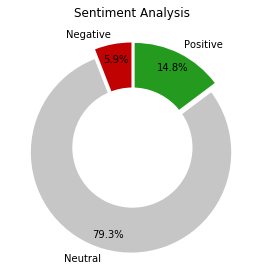

In [100]:
graphSentiment(df)

In [97]:
pdf = FPDF('P', 'mm', 'A4')

pdf.add_page()

#Set Title
pdf.set_font('Arial', 'B', 20)
pdf.cell(0, 10, 'Social Media Report', 0, 1, 'C')

#First row of data
pdf.cell(0, 10, ' ', 0, 1, 'C')

pdf.set_font('Arial', '', 14)
volume, percentage = fc.volumeCategories('../output/predicted.csv')
pdf.cell(95, 10, f'Total of tweets {volume}')

pdf.set_font('Arial', '', 14)
pdf.cell(95, 10, f'Percentage of tweets classificated {percentage}%', 0, 1, 'C')

pdf.cell(0, 10, ' ', 0, 1, 'C')
#Categories
pdf.set_font('Arial', '', 14)
pdf.cell(0, 10, 'Categories', 0, 1, 'C')
pdf.image('../output/barcategories.png', 40, h=90)

pdf.cell(0, 10, ' ', 0, 1, 'C')
#Sentiment
pdf.set_font('Arial', '', 14)
pdf.cell(95, 10, 'Sentiment', 0, 0, 'C')
pdf.image('../output/sentiment.png', 5, 170, h=70)

pdf.set_font('Arial', '', 14)
pdf.cell(95, 10, 'Sentiment by Category', 0, 1, 'C')
pdf.image('../output/sentimentcat.png', 100, 170, h=70)

pdf.output('../output/report.pdf', 'F')

print('Your PDF is ready')


NameError: name 'FPDF' is not defined